# Alışveriş Davranışı ve Gelir Analizi 

## Veri Hazırlığı

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Shoppers_Behaviour_and_Revenue.csv')

# Rename columns as per the instructions
column_names = {
    'Administrative': 'YonetimSayfasi',
    'Administrative_Duration': 'YonetimSuresi',
    'Informational': 'BilgiSayfasi',
    'Informational_Duration': 'BilgiSuresi',
    'ProductRelated': 'UrunSayfasi',
    'ProductRelated_Duration': 'UrunSuresi',
    'BounceRates': 'HemenCikmaOrani',
    'ExitRates': 'SayfaCikisOrani',
    'PageValues': 'SayfaDegeri',
    'SpecialDay': 'OzelGunSkoru',
    'Month': 'Ay',
    'OperatingSystems': 'IsletimSistemi',
    'Browser': 'Tarayici',
    'Region': 'Bolge',
    'TrafficType': 'TrafikTuru',
    'VisitorType': 'ZiyaretciTuru',
    'Weekend': 'HaftaSonu',
    'Revenue': 'SatinAlim'
}
df = df.rename(columns=column_names)

In [2]:
df.head()

,YonetimSayfasi,YonetimSuresi,BilgiSayfasi,BilgiSuresi,UrunSayfasi,UrunSuresi,HemenCikmaOrani,SayfaCikisOrani,SayfaDegeri,OzelGunSkoru,Ay,IsletimSistemi,Tarayici,Bolge,TrafikTuru,ZiyaretciTuru,HaftaSonu,SatinAlim
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [108]:
# Data Cleaning: Handle missing values (if any) and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Correct data types
df['HaftaSonu'] = df['HaftaSonu'].astype(bool)
df['SatinAlim'] = df['SatinAlim'].astype(bool)

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['Ay', 'IsletimSistemi', 'Tarayici', 'Bolge', 'TrafikTuru', 'ZiyaretciTuru'], drop_first=True)


In [109]:
df.dtypes

YonetimSayfasi                       int64
YonetimSuresi                      float64
BilgiSayfasi                         int64
BilgiSuresi                        float64
UrunSayfasi                          int64
UrunSuresi                         float64
HemenCikmaOrani                    float64
SayfaCikisOrani                    float64
SayfaDegeri                        float64
OzelGunSkoru                       float64
HaftaSonu                             bool
SatinAlim                             bool
Ay_Dec                                bool
Ay_Feb                                bool
Ay_Jul                                bool
Ay_June                               bool
Ay_Mar                                bool
Ay_May                                bool
Ay_Nov                                bool
Ay_Oct                                bool
Ay_Sep                                bool
IsletimSistemi_2                      bool
IsletimSistemi_3                      bool
IsletimSist

In [110]:
df.head()

,YonetimSayfasi,YonetimSuresi,BilgiSayfasi,BilgiSuresi,UrunSayfasi,UrunSuresi,HemenCikmaOrani,SayfaCikisOrani,SayfaDegeri,OzelGunSkoru,HaftaSonu,SatinAlim,Ay_Dec,Ay_Feb,Ay_Jul,Ay_June,Ay_Mar,Ay_May,Ay_Nov,Ay_Oct,Ay_Sep,IsletimSistemi_2,IsletimSistemi_3,IsletimSistemi_4,IsletimSistemi_5,IsletimSistemi_6,IsletimSistemi_7,IsletimSistemi_8,Tarayici_2,Tarayici_3,Tarayici_4,Tarayici_5,Tarayici_6,Tarayici_7,Tarayici_8,Tarayici_9,Tarayici_10,Tarayici_11,Tarayici_12,Tarayici_13,Bolge_2,Bolge_3,Bolge_4,Bolge_5,Bolge_6,Bolge_7,Bolge_8,Bolge_9,TrafikTuru_2,TrafikTuru_3,TrafikTuru_4,TrafikTuru_5,TrafikTuru_6,TrafikTuru_7,TrafikTuru_8,TrafikTuru_9,TrafikTuru_10,TrafikTuru_11,TrafikTuru_12,TrafikTuru_13,TrafikTuru_14,TrafikTuru_15,TrafikTuru_16,TrafikTuru_17,TrafikTuru_18,TrafikTuru_19,TrafikTuru_20,ZiyaretciTuru_Other,ZiyaretciTuru_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## Keşifsel Veri Analizi (EDA)

Veri setinin temel özelliklerini anlamak için keşifsel veri analizi yapılmıştır. Aşağıdaki bulgular ve görselleştirmeler elde edilmiştir:

*   **İstatistiksel Özetler:** Sayısal değişkenlerin temel istatistiksel özetleri incelenmiştir.
*   **HaftaSonu ve Satın Alma İlişkisi:** Hafta sonu ziyaretlerinin satın alma oranları üzerindeki etkisi incelenmiştir. (Bkz. HaftaSonu_SatinAlim.png)
*   **Ziyaretçi Türü ve Satın Alma İlişkisi:** Geri dönen ziyaretçiler ile yeni ziyaretçilerin satın alma davranışları karşılaştırılmıştır. (Bkz. ZiyaretciTuru_SatinAlim.png)
*   **Ay ve Satın Alma İlişkisi:** Yılın farklı aylarındaki satın alma eğilimleri analiz edilmiştir. (Bkz. Ay_SatinAlim.png)
*   **Sayfa Değeri ve Satın Alma İlişkisi:** Sayfa değerlerinin satın alma kararları üzerindeki etkisi incelenmiştir. (Bkz. SayfaDegeri_SatinAlim.png)
*   **Değişkenler Arası Korelasyon:** Değişkenler arasındaki ilişkileri gösteren bir ısı haritası oluşturulmuştur. (Bkz. Korelasyon_Isi_Haritasi.png)


In [111]:
df.describe()

,YonetimSayfasi,YonetimSuresi,BilgiSayfasi,BilgiSuresi,UrunSayfasi,UrunSuresi,HemenCikmaOrani,SayfaCikisOrani,SayfaDegeri,OzelGunSkoru
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


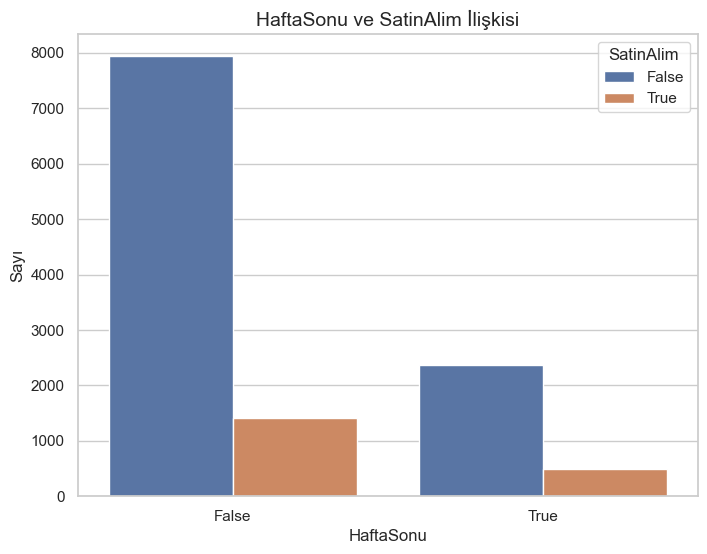

In [112]:
# HaftaSonu vs SatinAlim
plt.figure(figsize=(8, 6))
sns.countplot(x='HaftaSonu', hue='SatinAlim', data=df)
plt.title('HaftaSonu ve SatinAlim İlişkisi')
plt.xlabel('HaftaSonu')
plt.ylabel('Sayı')
plt.show()

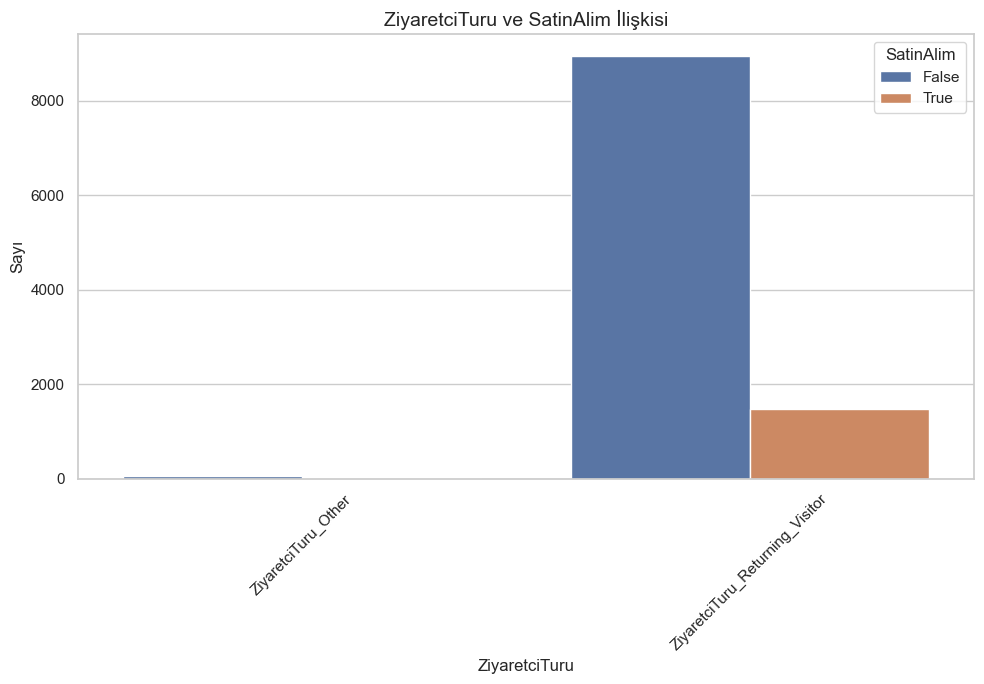

In [113]:
# One-hot encoded ziyaretçi türü sütunlarını seç
visitor_type_cols = [col for col in df.columns if 'ZiyaretciTuru_' in col]
temp_df = df[visitor_type_cols + ['SatinAlim']].copy()

# Veri çerçevesini "melt" et (uzun formata dönüştür)
melted_df = temp_df.melt(id_vars=['SatinAlim'], var_name='ZiyaretciTuru', value_name='Value')
melted_df = melted_df[melted_df['Value'] == 1]  # Sadece aktif satırları al

# Görselleştir
plt.figure(figsize=(10, 7))
sns.countplot(x='ZiyaretciTuru', hue='SatinAlim', data=melted_df)
plt.title('ZiyaretciTuru ve SatinAlim İlişkisi')
plt.xlabel('ZiyaretciTuru')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


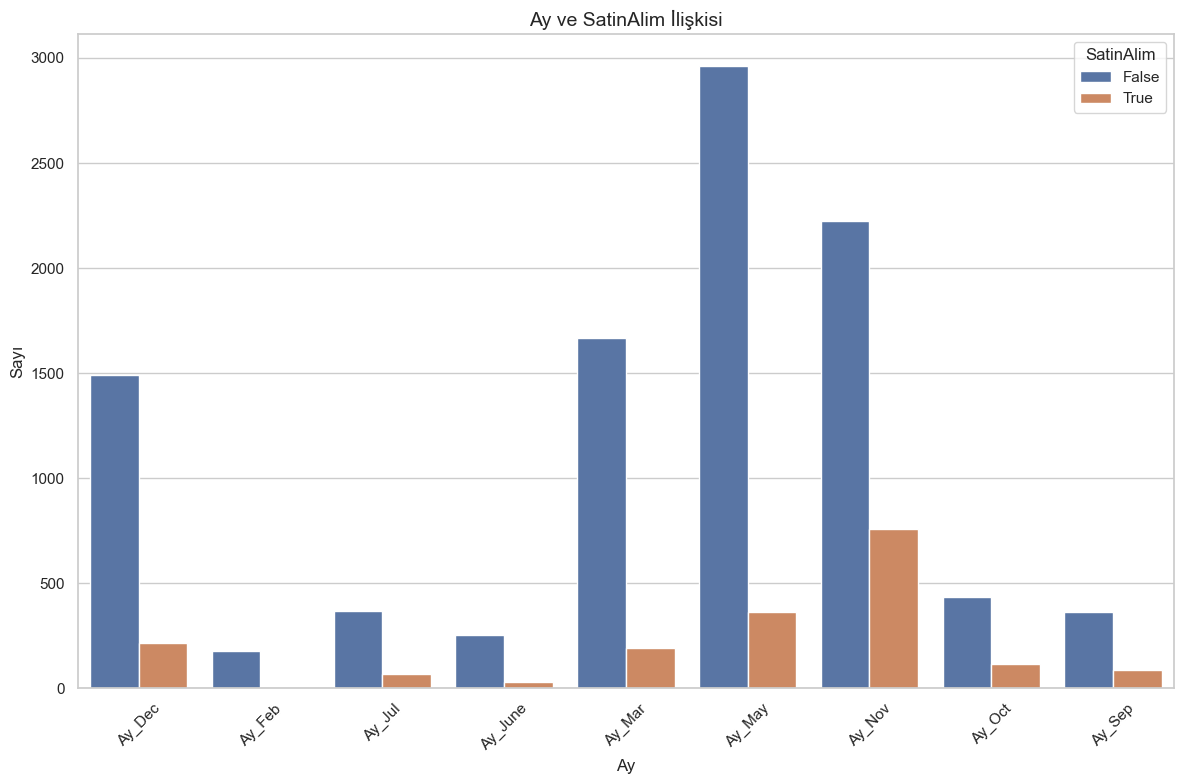

In [114]:
# Ay sütunlarını al (One-hot encoded)
month_cols = [col for col in df.columns if 'Ay_' in col]
temp_df_month = df[month_cols + ['SatinAlim']].copy()

# Melt işlemi
melted_df_month = temp_df_month.melt(id_vars=['SatinAlim'], var_name='Ay', value_name='Value')
melted_df_month = melted_df_month[melted_df_month['Value'] == 1]

# Grafik
plt.figure(figsize=(12, 8))
sns.countplot(x='Ay', hue='SatinAlim', data=melted_df_month)
plt.title('Ay ve SatinAlim İlişkisi')
plt.xlabel('Ay')
plt.ylabel('Sayı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


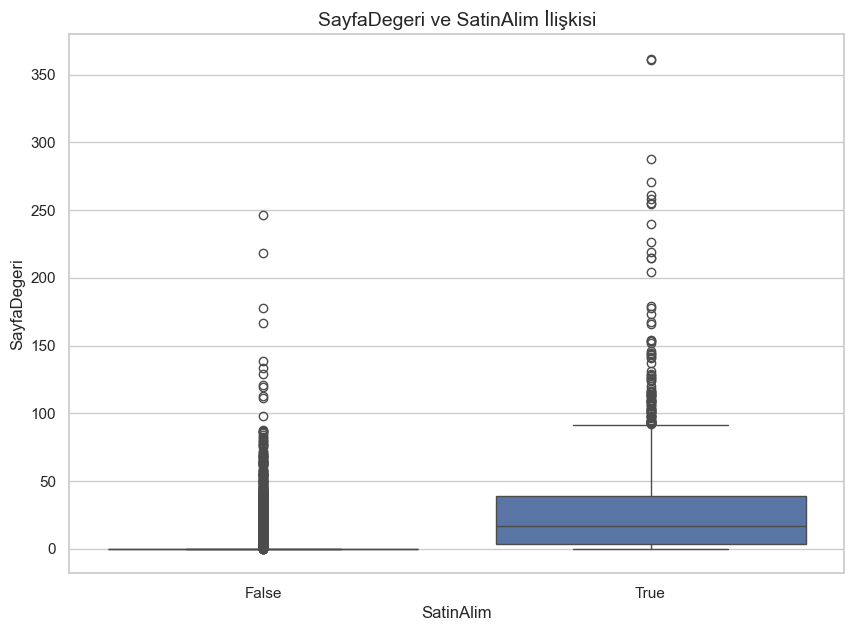

In [115]:
# Sayfa Değeri = Toplam Satış Geliri (Revenue) / Benzersiz Sayfa Görüntüleme Sayısı (Unique Pageviews)
plt.figure(figsize=(10, 7))
sns.boxplot(x='SatinAlim', y='SayfaDegeri', data=df)
plt.title('SayfaDegeri ve SatinAlim İlişkisi')
plt.xlabel('SatinAlim')
plt.ylabel('SayfaDegeri')
plt.show()


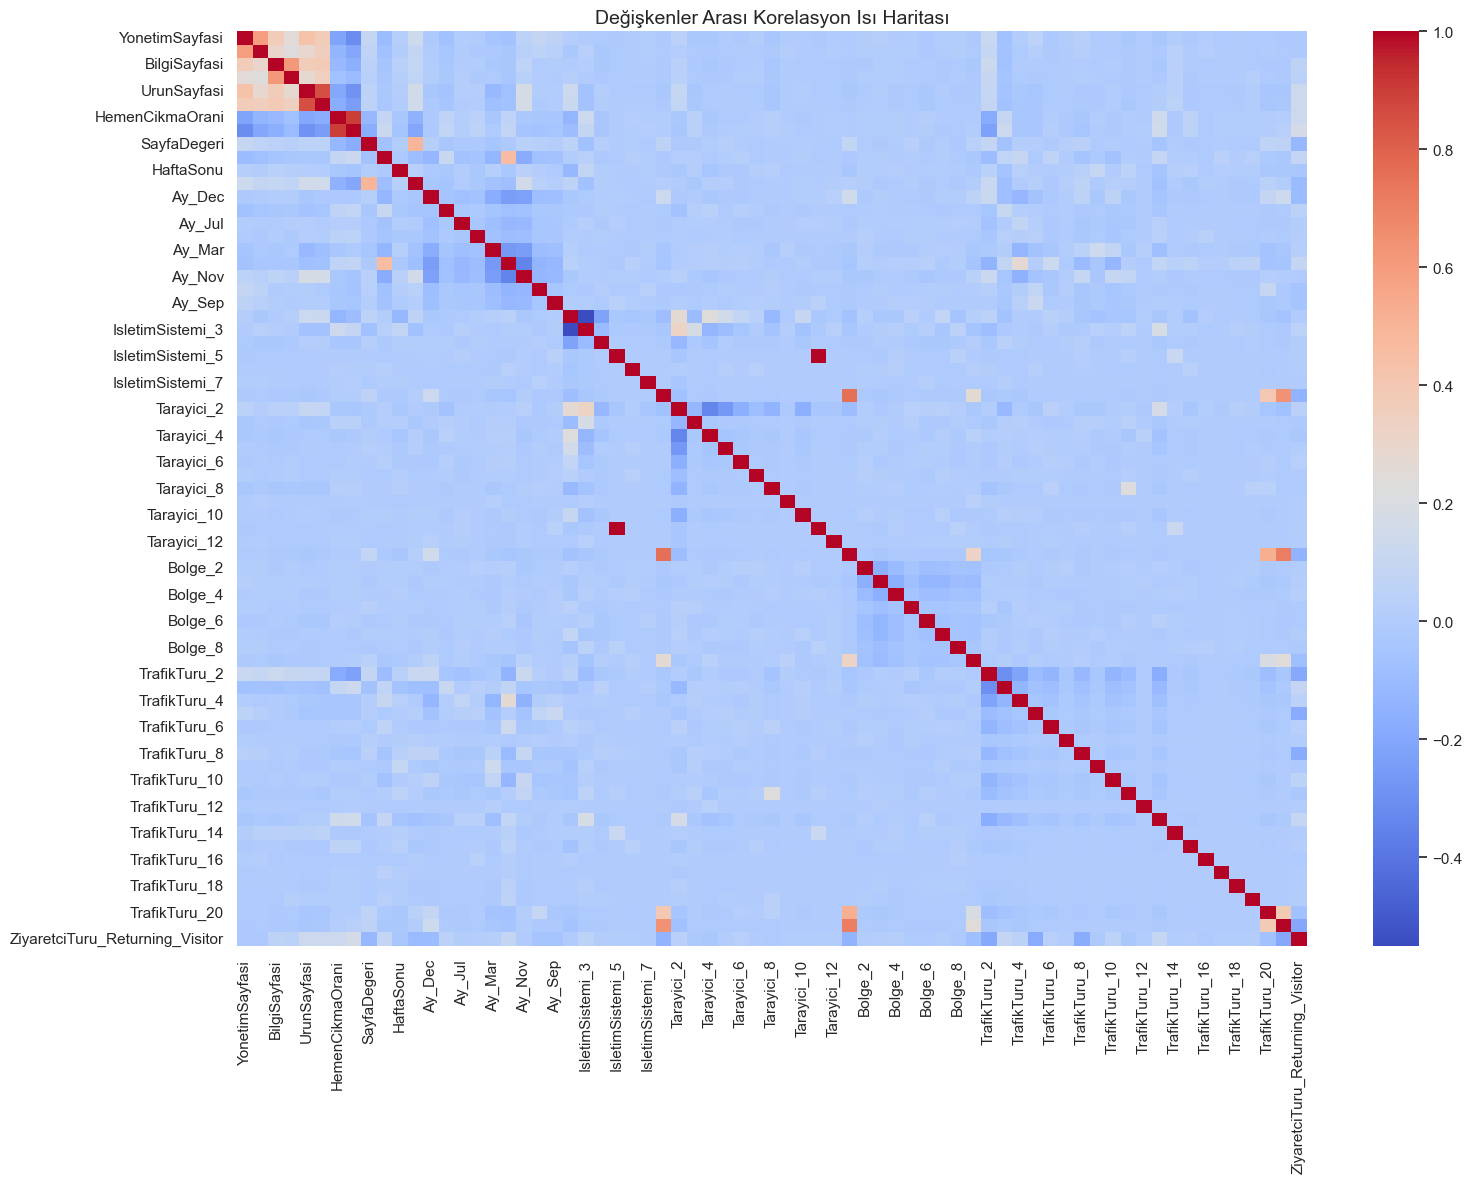

In [116]:
# Boolean sütunları int'e çevir
df_corr = df.copy()
df_corr['HaftaSonu'] = df_corr['HaftaSonu'].astype(int)
df_corr['SatinAlim'] = df_corr['SatinAlim'].astype(int)

# Korelasyon matrisi
plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), annot=False, cmap='coolwarm')
plt.title('Değişkenler Arası Korelasyon Isı Haritası')
plt.tight_layout()
plt.show()


## Özellik Mühendisliği

Model performansını artırmak ve daha fazla içgörü elde etmek için yeni özellikler türetilmiştir:

*   **ToplamSure:** Yönetim, Bilgi ve Ürün sayfalarında geçirilen toplam süre.
*   **EtkilesimOrani:** Toplam sayfa sayısı ile toplam süre arasındaki oran, ziyaretçinin etkileşim düzeyini gösterir.
*   **ZiyaretciBinary:** Ziyaretçi türünü ikili (0: Yeni, 1: Geri Dönen) bir değişkene dönüştürür.
*   **YuksekDegerliSayfa:** Sayfa değeri ortalamanın üzerinde olan sayfaları belirten ikili bir değişken.


In [117]:
# ToplamSure = gezinme sürelerinin toplamı
df["ToplamSure"] = df["YonetimSuresi"] + df["BilgiSuresi"] + df["UrunSuresi"]

# EtkilesimOrani = toplam sayfa sayısı / toplam süre (sıfıra bölme durumuna karşı önlem alındı)
df["EtkilesimOrani"] = (df["YonetimSayfasi"] + df["BilgiSayfasi"] + df["UrunSayfasi"]) / (df["ToplamSure"] + 1e-6)

# ZiyaretciBinary = 1 ise geri dönen ziyaretçi, 0 ise yeni ziyaretçi
df["ZiyaretciBinary"] = df["ZiyaretciTuru_Returning_Visitor"].astype(int)  # Geri dönen ziyaretçi için 1, diğerleri için 0

# YuksekDegerliSayfa = SayfaDegeri ortalamanın üzerindeyse 1, değilse 0
df["YuksekDegerliSayfa"] = (df["SayfaDegeri"] > df["SayfaDegeri"].mean()).astype(int)

## Makine Öğrenmesi Modelleri

`SatinAlim` (satın alma olup olmadığı) değişkenini tahmin etmek için üç farklı makine öğrenimi modeli eğitilecek.

*   **Lojistik Regresyon (Logistic Regression)**
*   **Rastgele Orman (Random Forest)**
*   **XGBoost**


In [118]:
# Özellikleri (X) ve hedef değişkeni (y) tanımla
X = df.drop("SatinAlim", axis=1)
y = df["SatinAlim"]

In [119]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim, %20 test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lojistik Regresyon Performansı
Accuracy: 0.8886
Precision: 0.7123
Recall: 0.4171
F1-Score: 0.5261


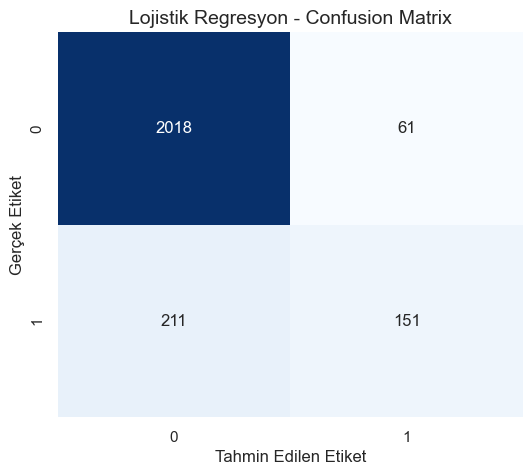

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

#  Modeli oluştur ve eğit
log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc = roc_auc_score(y_test, y_proba_log)
cm = confusion_matrix(y_test, y_pred_log)

#  Sonuçları yazdır
print("Lojistik Regresyon Performansı")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Lojistik Regresyon - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()




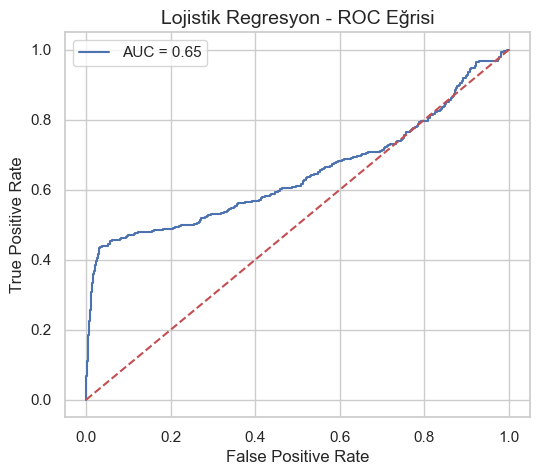

In [121]:
# 🔴 ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_log)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Lojistik Regresyon - ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

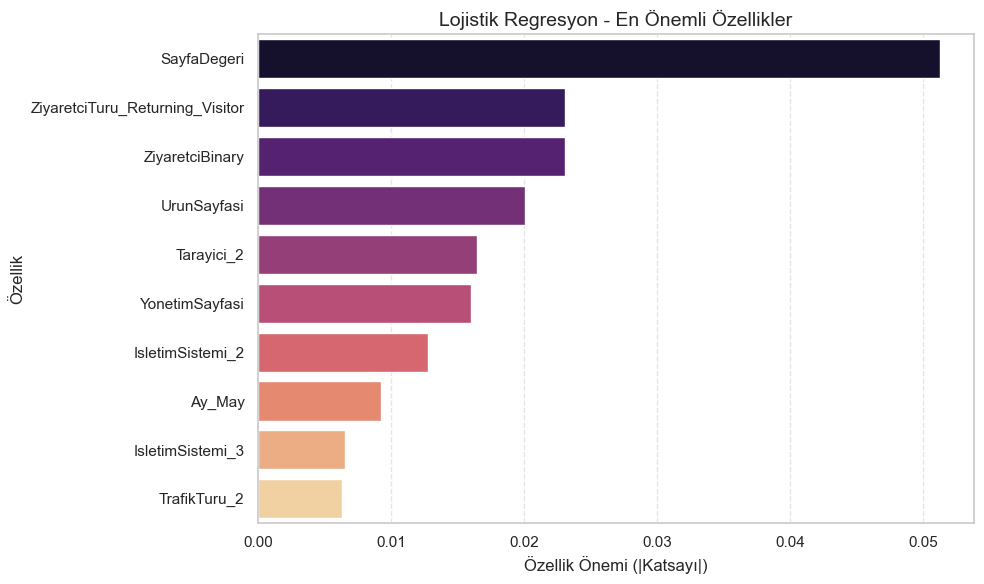

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Katsayıları al
coefficients = log_model.coef_[0]
feature_names = X_train.columns

# Mutlak katsayı değerlerine göre önem derecelendirmesi
importance_df = pd.DataFrame({
    'Özellik': feature_names,
    'Önem': np.abs(coefficients)
}).sort_values(by='Önem', ascending=False).head(10)  # İlk 10 önemli özellik

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Önem', y='Özellik', hue='Özellik', palette='magma', legend=False)
plt.title("Lojistik Regresyon - En Önemli Özellikler")
plt.xlabel("Özellik Önemi (|Katsayı|)")
plt.ylabel("Özellik")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Random Forest Performansı
Accuracy: 0.9005
Precision: 0.7245
Recall: 0.5304
F1-Score: 0.6124


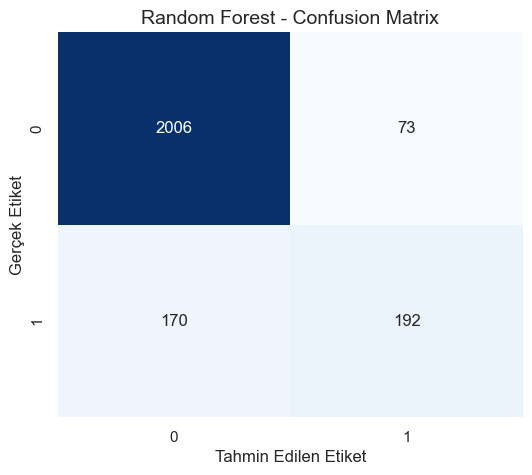

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

#  Modeli oluştur ve eğit
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc = roc_auc_score(y_test, y_proba_rf)
cm = confusion_matrix(y_test, y_pred_rf)

#  Sonuçları yazdır
print("Random Forest Performansı")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()

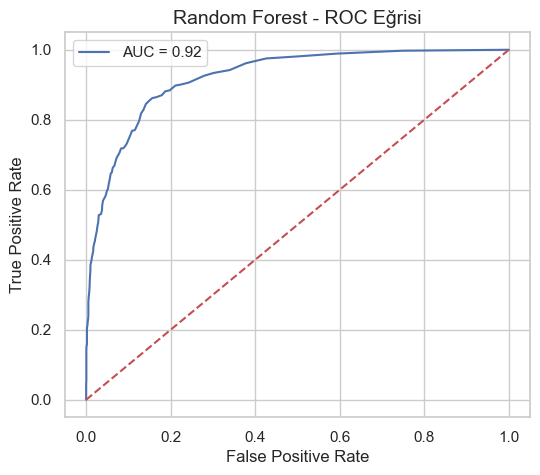

In [129]:
#  ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Random tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

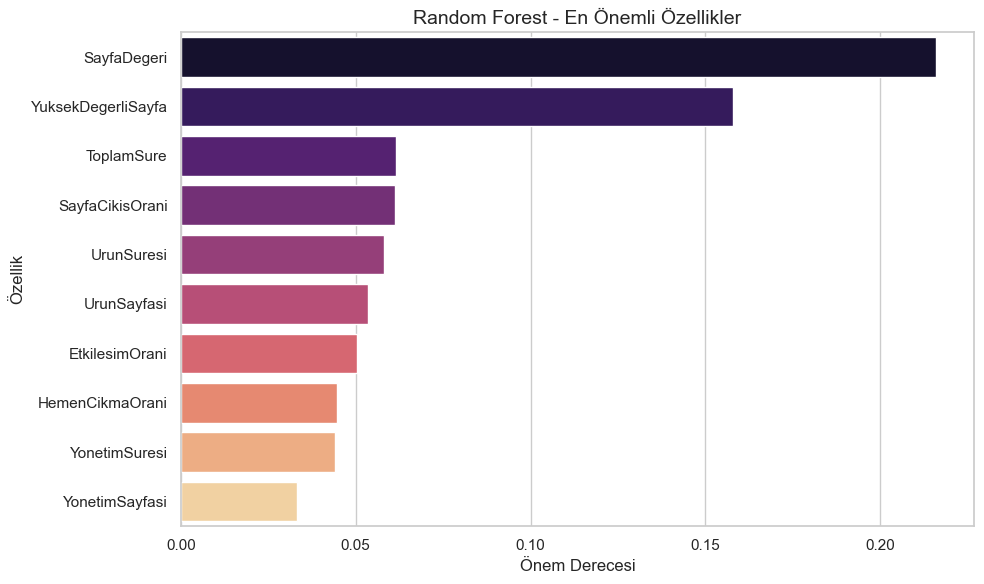

In [127]:
# Özellik Önem Grafiği
import pandas as pd

feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Özellik": feature_names,
    "Önem": feature_importances
}).sort_values(by="Önem", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Önem", y="Özellik", hue="Özellik", palette="magma", legend=False)
plt.title("Random Forest - En Önemli Özellikler")
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


XGBoost Performansı
Accuracy: 0.8988
Precision: 0.6910
Recall: 0.5746
F1-Score: 0.6275


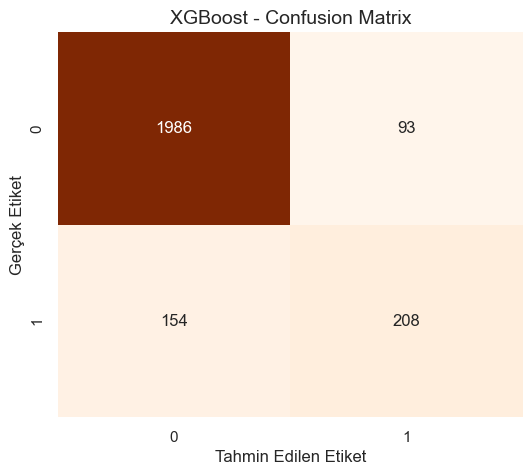

In [130]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

#  Modeli oluştur ve eğit
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

#  Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

#  Performans metrikleri
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc = roc_auc_score(y_test, y_proba_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

#  Sonuçları yazdır
print("XGBoost Performansı")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

#  Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()




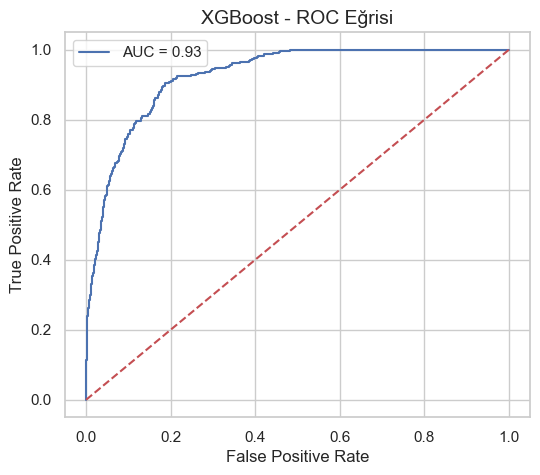

In [131]:
#  ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

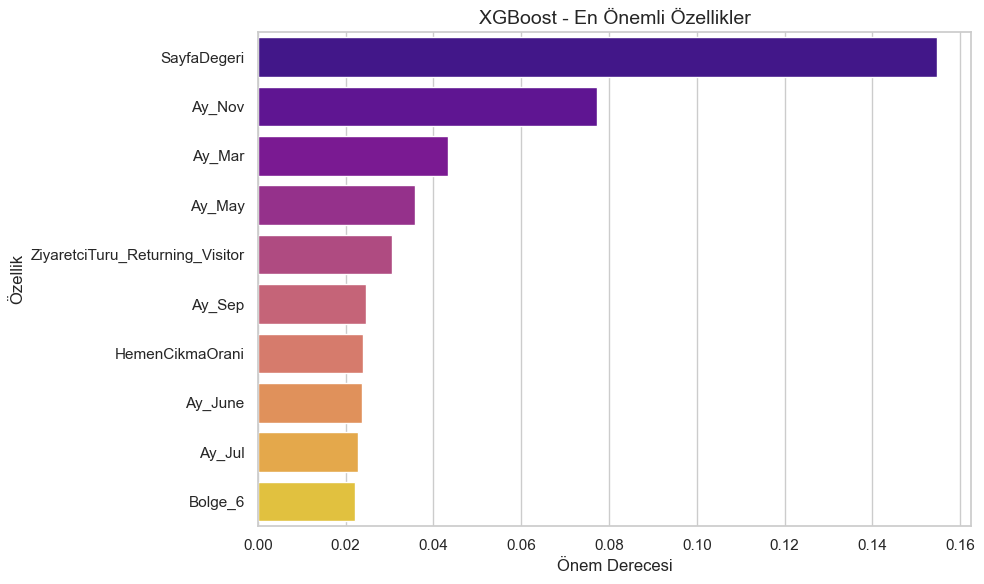

In [133]:
importance_values = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    "Özellik": feature_names,
    "Önem": importance_values
}).sort_values(by="Önem", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Önem", y="Özellik", hue="Özellik", palette="plasma", legend=False)
plt.title("XGBoost - En Önemli Özellikler")
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()



**Model Performans Özetleri:**

| Model Adı          | Accuracy | Precision | Recall | F1-Score |ROC AUC|
|--------------------|----------|-----------|--------|----------|-------|
| XGBoost            | 0.8988   | 0.6910    | 0.5746 | 0.6275   | 0.93  |
| Random Forest      | 0.9005   | 0.7245    | 0.5304 | 0.6124   | 0.92  |
| Logistic Regression| 0.8886   | 0.7123    | 0.4171 | 0.5261   | 0.65  |

**XGBoost** modeli, en yüksek Accuracy ve ROC AUC değerleriyle en iyi performansı göstermiştir
özellikle F1-Score değeri.


## Hata Analizi

Modelin yanlış tahmin ettiği durumlar incelenmiştir. Hataların `ZiyaretciTuru` veya `Ay` ile ilişkili olup olmadığına bakılmıştır. Analiz, özellikle geri dönen ziyaretçiler ve Mart ayı ile ilgili hataların daha sık olduğunu göstermiştir.


In [57]:
# Hatalı tahmin indekslerini bul (örneğin lojistik regresyon için)
hatali_indexler = X_test[(y_test != y_pred_log)].index
hatali_kayitlar = X_test.loc[hatali_indexler].copy()

# ZiyaretciTuru sütununu yeniden oluştur
def geri_don_zayaretci_turu(row):
    if 'ZiyaretciTuru_Returning_Visitor' in row and row['ZiyaretciTuru_Returning_Visitor'] == 1:
        return 'Returning_Visitor'
    elif 'ZiyaretciTuru_Other' in row and row['ZiyaretciTuru_Other'] == 1:
        return 'Other'
    else:
        return 'New_Visitor'

hatali_kayitlar['ZiyaretciTuru'] = hatali_kayitlar.apply(geri_don_zayaretci_turu, axis=1)

# Ay sütununu yeniden oluştur
ay_sutunlari = [col for col in hatali_kayitlar.columns if col.startswith('Ay_')]
hatali_kayitlar['Ay'] = hatali_kayitlar[ay_sutunlari].idxmax(axis=1).str.replace('Ay_', '')

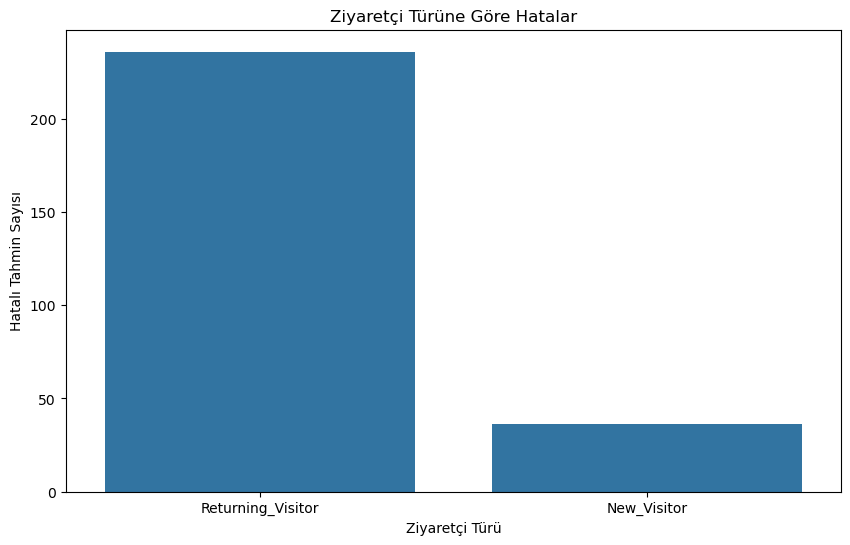

In [61]:
# Ziyaretçi türü için grafik
plt.figure(figsize=(10, 6))
sns.countplot(data=hatali_kayitlar, x='ZiyaretciTuru', order=ziyaretci_hatalar.index)
plt.title('Ziyaretçi Türüne Göre Hatalar')
plt.xlabel('Ziyaretçi Türü')
plt.ylabel('Hatalı Tahmin Sayısı')
plt.show()



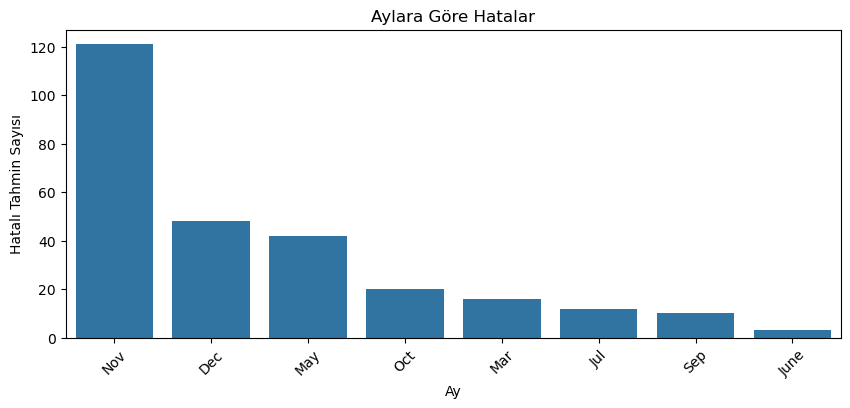

In [62]:
# Ay bazlı grafik
plt.figure(figsize=(10, 4))
sns.countplot(data=hatali_kayitlar, x='Ay', order=ay_hatalar.index)
plt.title('Aylara Göre Hatalar')
plt.xlabel('Ay')
plt.ylabel('Hatalı Tahmin Sayısı')
plt.xticks(rotation=45)
plt.show()

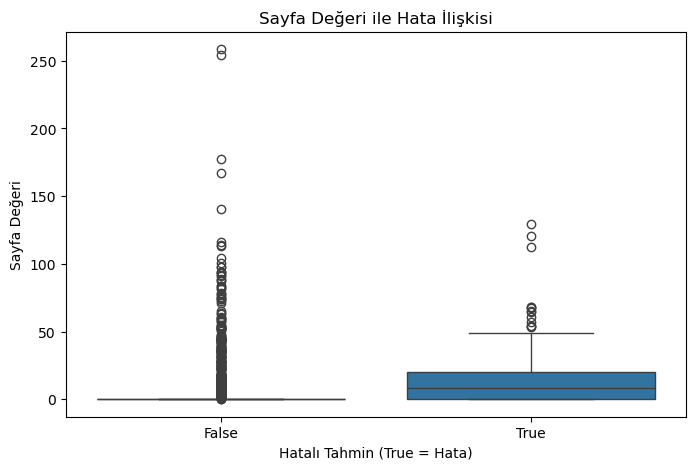

In [63]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=y_test != y_pred_log, y=X_test['SayfaDegeri'])
plt.title("Sayfa Değeri ile Hata İlişkisi")
plt.xlabel("Hatalı Tahmin (True = Hata)")
plt.ylabel("Sayfa Değeri")
plt.show()


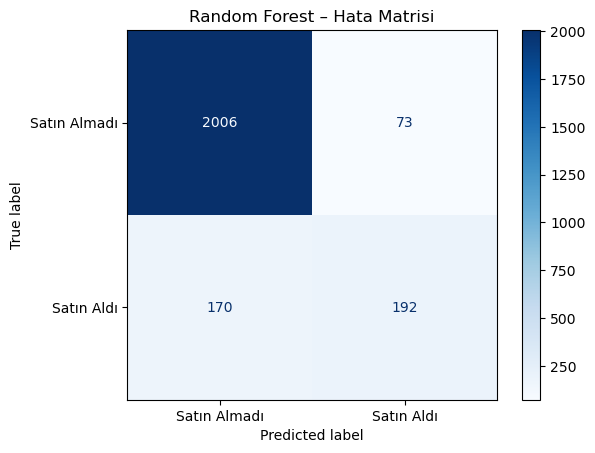

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest için tahmin yapıldıktan sonra:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    display_labels=["Satın Almadı", "Satın Aldı"],
    cmap="Blues"
)
plt.title("Random Forest – Hata Matrisi")
plt.show()


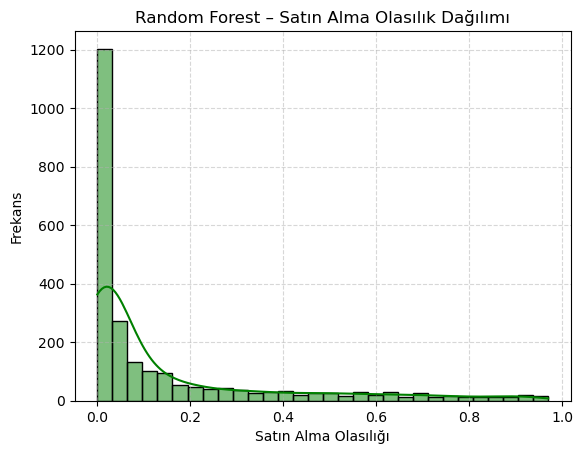

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest olasılık dağılımı
sns.histplot(y_proba_rf, bins=30, kde=True, color="green")
plt.title("Random Forest – Satın Alma Olasılık Dağılımı")
plt.xlabel("Satın Alma Olasılığı")
plt.ylabel("Frekans")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


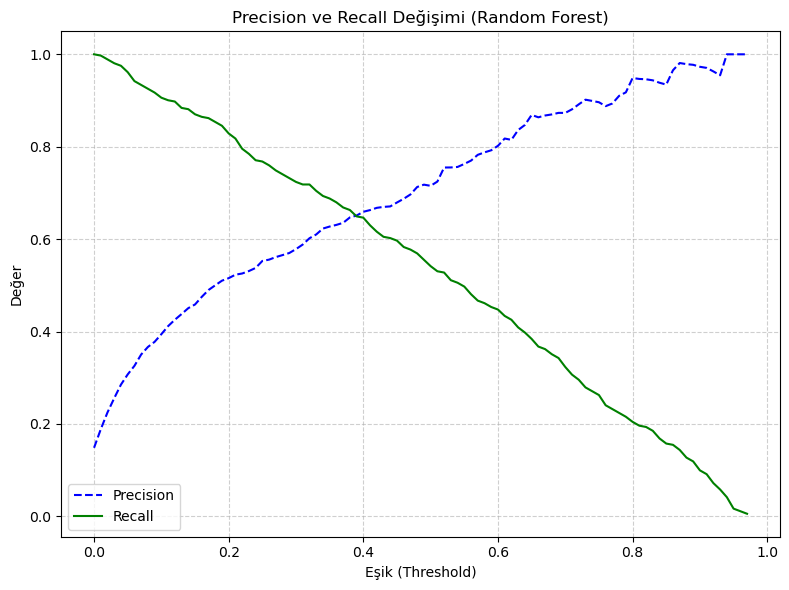

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Uyumlu yazı tipi
plt.rcParams['font.family'] = 'DejaVu Sans'  # Bu font matplotlib ile birlikte gelir ve Türkçe karakterleri destekler

# Değerleri hesapla
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_rf)

# Grafik çiz
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Eşik (Threshold)")
plt.ylabel("Değer")
plt.title("Precision ve Recall Değişimi (Random Forest)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [76]:
import numpy as np

# Sayfa değeri düşük segmenti al
segment = X_test[X_test['SayfaDegeri'] < 10]

# Gerçek değerler
gercekler = y_test.loc[segment.index]

# segment.index'e karşılık gelen pozisyonları al
konumlar = X_test.index.get_indexer(segment.index)

# Bu pozisyonlara karşılık gelen tahminleri al
tahminler = y_pred_rf[konumlar]

# Hata sayısını hesapla
segment_hatalar = (gercekler != tahminler).sum()
print(f"📌 Random Forest – Sayfa değeri < 10 olanlarda hata sayısı: {segment_hatalar}")


📌 Random Forest – Sayfa değeri < 10 olanlarda hata sayısı: 136


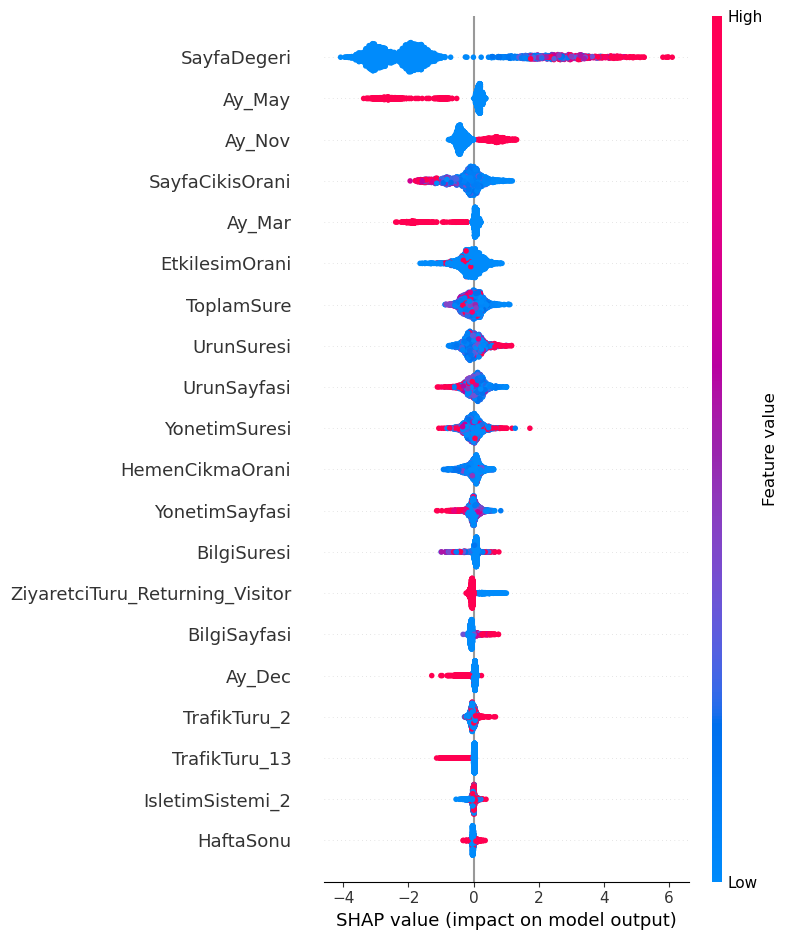

In [78]:
import shap

# TreeExplainer kullan
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Özellik isimlerini düzgün kullanmak için DataFrame olmalı
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

shap.summary_plot(shap_values, X_test)


##  Segment Analizi

Müşteriler `ZiyaretciTuru`, `Bolge` ve `Tarayici`"ye göre segmentlere ayrılmış ve satın alma oranları, sitede geçirilen süre ve sayfa sayıları karşılaştırılmıştır:

*   **Ziyaretçi Türü Analizi:** Geri dönen ziyaretçilerin satın alma oranları, yeni ziyaretçilere göre daha düşüktür, ancak sitede daha fazla zaman geçirme ve daha fazla ürün sayfası ziyaret etme eğilimindedirler.
*   **Bölge Analizi:** Farklı bölgelerdeki ziyaretçilerin satın alma davranışları ve etkileşim düzeyleri arasında farklılıklar gözlemlenmiştir.
*   **Tarayıcı Analizi:** Kullanılan tarayıcıya göre satın alma oranları ve etkileşim metrikleri değişmektedir.

In [138]:
# Test verisine tahminleri ve gerçekleri ekle
sonuc_df = X_test.copy()
sonuc_df["Gercek"] = y_test
sonuc_df["Tahmin"] = y_pred_rf  # Random Forest model tahmini
sonuc_df["SatınAlmaOranı"] = y_proba_rf  # Olasılık
sonuc_df["ToplamSüre"] = X_test["ToplamSure"]
sonuc_df["SayfaSayisi"] = (
    X_test[["YonetimSayfasi", "BilgiSayfasi", "UrunSayfasi"]].sum(axis=1)
)

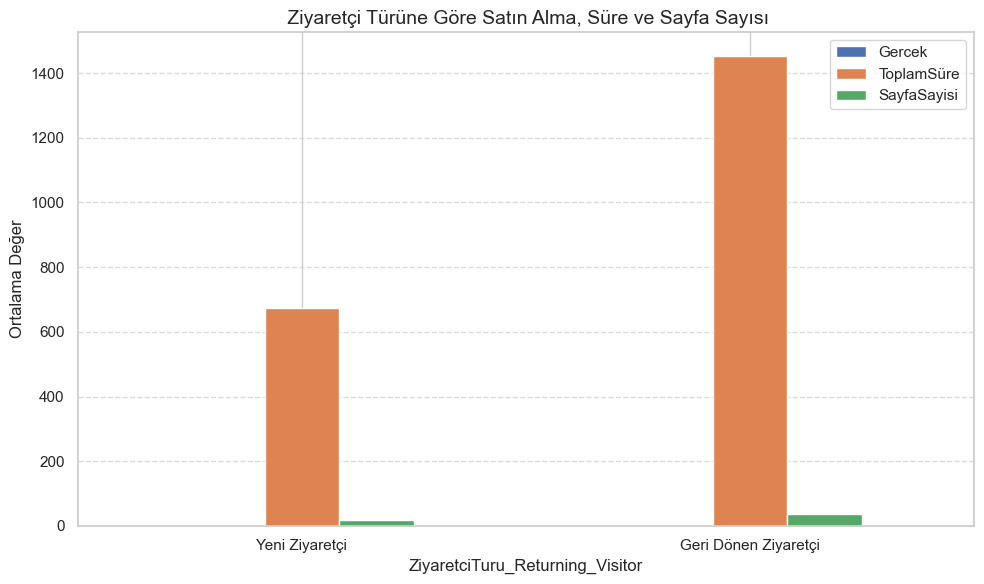

In [135]:
# Ziyaretçi Türü Segmenti
ziyaretci_analiz = sonuc_df.groupby("ZiyaretciTuru_Returning_Visitor").agg({
    "Gercek": "mean",
    "ToplamSüre": "mean",
    "SayfaSayisi": "mean"
}).rename(index={0: "Yeni Ziyaretçi", 1: "Geri Dönen Ziyaretçi"})

ziyaretci_analiz.plot(kind="bar", figsize=(10, 6))
plt.title(" Ziyaretçi Türüne Göre Satın Alma, Süre ve Sayfa Sayısı")
plt.ylabel("Ortalama Değer")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


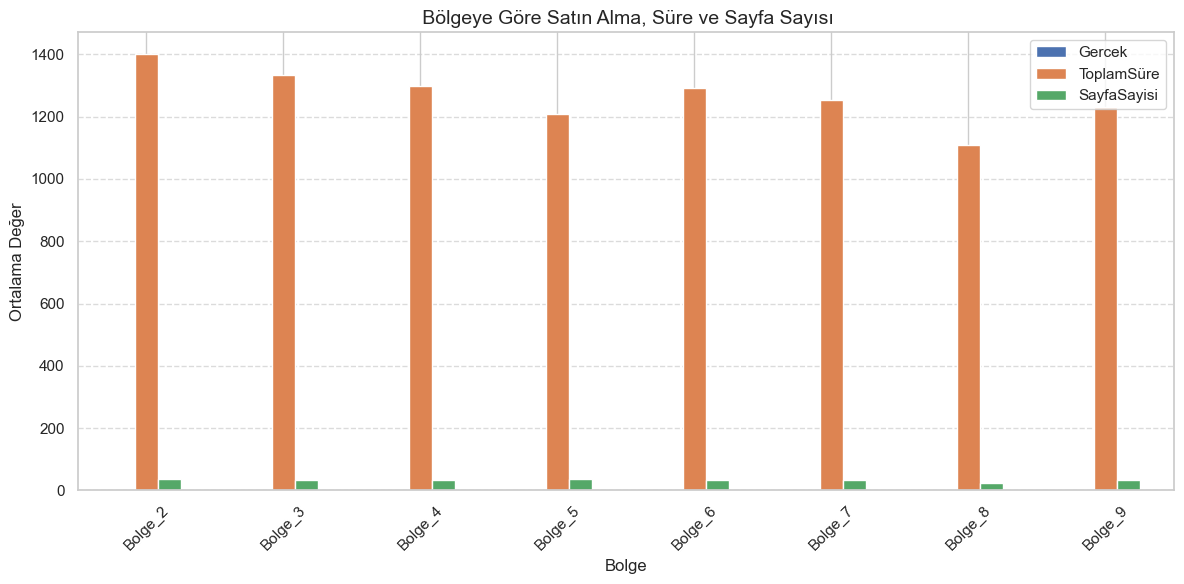

In [136]:
# Bölge Segmenti
bolge_kolonlari = [col for col in X_test.columns if col.startswith("Bolge_")]
sonuc_df["Bolge"] = sonuc_df[bolge_kolonlari].idxmax(axis=1)

bolge_analiz = sonuc_df.groupby("Bolge").agg({
    "Gercek": "mean",
    "ToplamSüre": "mean",
    "SayfaSayisi": "mean"
})

bolge_analiz.plot(kind="bar", figsize=(12, 6))
plt.title(" Bölgeye Göre Satın Alma, Süre ve Sayfa Sayısı")
plt.ylabel("Ortalama Değer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


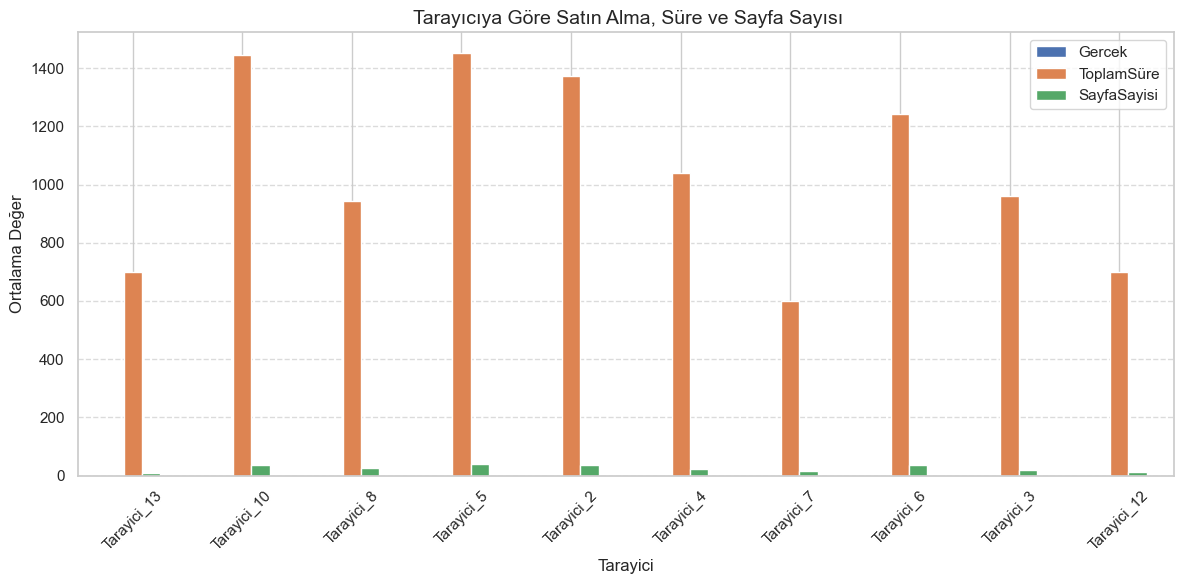

In [137]:
# Tarayıcı Segmenti
tarayici_kolonlari = [col for col in X_test.columns if col.startswith("Tarayici_")]
sonuc_df["Tarayici"] = sonuc_df[tarayici_kolonlari].idxmax(axis=1)

tarayici_analiz = sonuc_df.groupby("Tarayici").agg({
    "Gercek": "mean",
    "ToplamSüre": "mean",
    "SayfaSayisi": "mean"
}).sort_values("Gercek", ascending=False)

tarayici_analiz.plot(kind="bar", figsize=(12, 6))
plt.title(" Tarayıcıya Göre Satın Alma, Süre ve Sayfa Sayısı")
plt.ylabel("Ortalama Değer")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Zamansal Analiz

Satın alma davranışları aylara göre analiz edilmiştir. Aylık satın alma sayısını gösteren bir çizgi grafik oluşturulmuştur. (Bkz. Aylik_Satin_Alma_Sayisi.png)

*   Analiz, özellikle **Kasım** ayında (Black Friday gibi özel günler nedeniyle) satın alma sayılarında belirgin bir artış olduğunu göstermektedir.


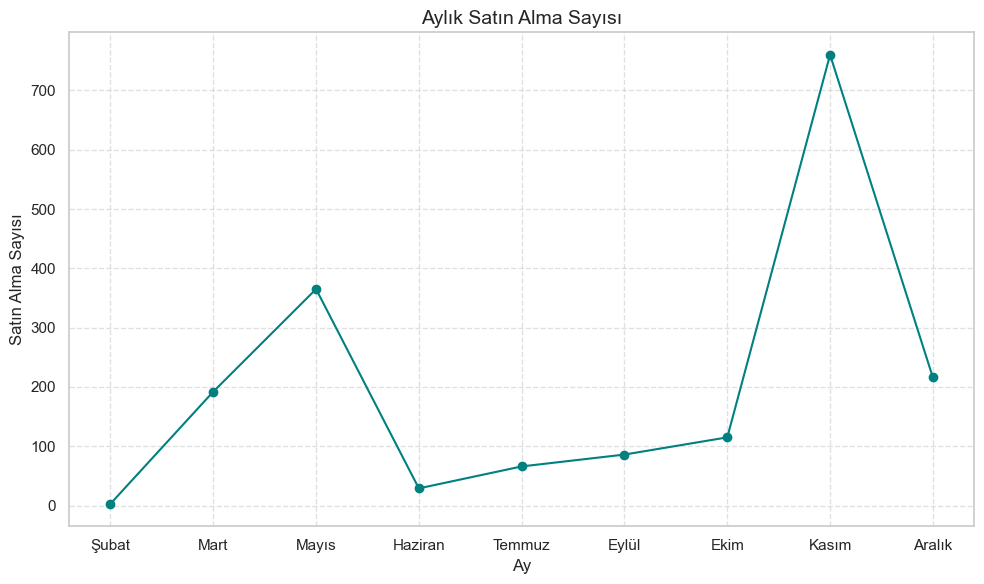

In [88]:
# Ay sütunlarını sırayla tanımla (doğru kronolojik sıra)
ay_sutunlari = ['Ay_Feb', 'Ay_Mar', 'Ay_May', 'Ay_June', 'Ay_Jul',
                'Ay_Sep', 'Ay_Oct', 'Ay_Nov', 'Ay_Dec']
ay_isimleri = ['Şubat', 'Mart', 'Mayıs', 'Haziran', 'Temmuz',
               'Eylül', 'Ekim', 'Kasım', 'Aralık']

# Satın alma yapılan gözlemlerden ay bazında toplam sayıları al
aylik_satinalma_sayilari = []
for ay in ay_sutunlari:
    toplam = df[df["SatinAlim"] == 1][ay].sum()
    aylik_satinalma_sayilari.append(toplam)
# Çizgi grafiği oluştur
plt.figure(figsize=(10, 6))
plt.plot(ay_isimleri, aylik_satinalma_sayilari, marker='o', linestyle='-', color='teal')
plt.title("Aylık Satın Alma Sayısı")
plt.xlabel("Ay")
plt.ylabel("Satın Alma Sayısı")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## Dönüşüm Hunisi Analizi

Ziyaretçilerin sitedeki yolculukları üç ana aşamada incelenmiştir: Ziyaret (Visit) → Etkileşim (Interaction) → Satın Alma (Purchase). (Bkz. Donusum_Hunisi.png)

*   **Ziyaret:** Toplam ziyaretçi sayısı.
*   **Etkileşim:** Ürün sayfalarını ziyaret eden veya sitede belirli bir süre geçiren ziyaretçiler.
*   **Satın Alma:** Gerçekleşen satın alma işlemleri.

Huni analizi, ziyaretçilerin hangi aşamalarda kaybedildiğini belirlemeye yardımcı olmuştur. Özellikle etkileşimden satın almaya geçiş aşamasında önemli bir düşüş gözlemlenmiştir.


In [101]:
from IPython.display import display
### 1. Ziyaretçi Türüne Göre Analiz
print("\nZiyaretçi Türü Analizi:")
visitor_type_analysis = df.groupby("ZiyaretciTuru_Returning_Visitor")[["SatinAlim", "ToplamSure", "UrunSayfasi"]].mean()
display(visitor_type_analysis)


Ziyaretçi Türü Analizi:


,SatinAlim,ToplamSure,UrunSayfasi
ZiyaretciTuru_Returning_Visitor,,,
False,0.246900,744.725588,17.835400
True,0.140926,1421.878615,34.462372


In [102]:
### 3. Tarayıcıya Göre Analiz
browser_cols = [col for col in df.columns if "Tarayici_" in col]
browser_data = df[browser_cols + ["SatinAlim", "ToplamSure", "UrunSayfasi"]]
melted_browser = browser_data.melt(id_vars=["SatinAlim", "ToplamSure", "UrunSayfasi"], var_name="Tarayici", value_name="Deger")
melted_browser = melted_browser[melted_browser["Deger"] == 1]
browser_analysis = melted_browser.groupby("Tarayici")[["SatinAlim", "ToplamSure", "UrunSayfasi"]].mean()
print("\nTarayıcı Analizi:")
display(browser_analysis)


Tarayıcı Analizi:


,SatinAlim,ToplamSure,UrunSayfasi
Tarayici,,,
Tarayici_10,0.196319,1334.746162,32.865031
Tarayici_11,0.166667,849.127738,12.166667
Tarayici_12,0.300000,813.288391,17.200000
Tarayici_13,0.285714,847.270841,16.125000
Tarayici_2,0.155144,1447.703877,35.126728
Tarayici_3,0.047619,797.690342,16.419048
Tarayici_4,0.177839,1261.856325,30.651163
Tarayici_5,0.184946,1278.284543,31.462366
Tarayici_6,0.114943,1313.174156,29.873563


Dönüşüm Hunisi:


,Aşama,KullaniciSayisi
0,Ziyaret,12205
1,Etkileşim,12187
2,Satın Alma,1908


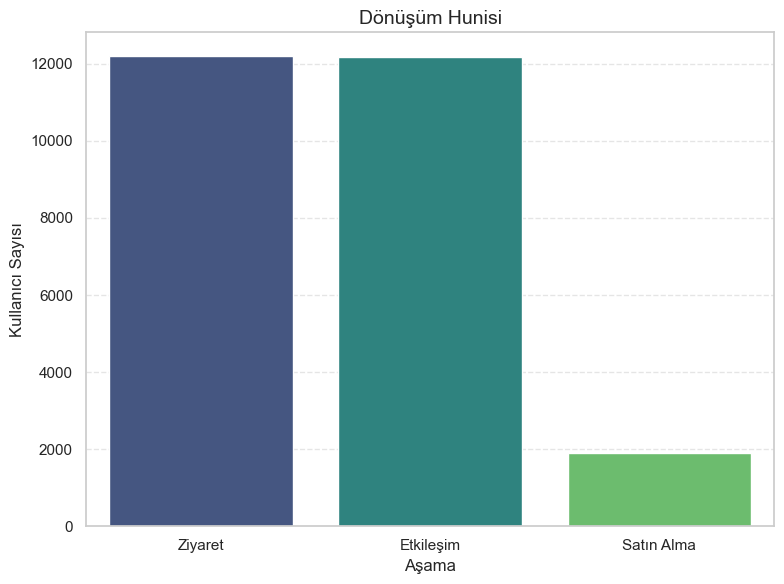

In [106]:
### 5. Dönüşüm Hunisi Analizi
toplam_ziyaret = len(df)
etkilesim = df[(df["UrunSayfasi"] > 0) | (df["ToplamSure"] > 0)].shape[0]
satin_alim = df[df["SatinAlim"] == 1].shape[0]

funnel_df = pd.DataFrame({
    "Aşama": ["Ziyaret", "Etkileşim", "Satın Alma"],
    "KullaniciSayisi": [toplam_ziyaret, etkilesim, satin_alim]
})

from IPython.display import display

print("Dönüşüm Hunisi:")
display(funnel_df)

plt.figure(figsize=(8, 6))
sns.barplot(data=funnel_df, x="Aşama", y="KullaniciSayisi", hue="Aşama", palette="viridis", legend=False)
plt.title("Dönüşüm Hunisi")
plt.ylabel("Kullanıcı Sayısı")
plt.xlabel("Aşama")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  Sonuç Raporu

*   **Yeni Ziyaretçilere Destek:** Yeni ziyaretçilerin satın alma oranları düşük olduğundan, onlara yönelik özel karşılama programları, rehberler veya ilk alışveriş indirimleri sunularak dönüşüm oranları artırılabilir.
*   **Hemen Çıkma Oranını Azaltma:** Yüksek hemen çıkma oranına sahip sayfalar belirlenmeli ve bu sayfaların içeriği, kullanıcı deneyimi ve çağrı-eylem (call-to-action) butonları optimize edilmelidir.
*   **Yüksek Değerli Sayfaların Deneyimini İyileştirme:** `SayfaDegeri` yüksek olan sayfaların kullanıcı deneyimi daha da iyileştirilmelidir. Bu sayfalar, ziyaretçilerin satın alma kararlarını etkilemede kritik rol oynamaktadır.
*   **Aylık Kampanyalar:** Özellikle **Kasım** gibi yoğun aylarda (Black Friday, Siber Pazartesi vb.) özel kampanyalar ve indirimler düzenlenerek satışlar maksimize edilebilir.
*   **Tarayıcı ve Bölgeye Özel Optimizasyonlar:** Farklı tarayıcılar ve bölgeler için site performansının ve kullanıcı deneyiminin optimize edilmesi, genel dönüşüm oranlarını artırabilir.
*   **Dönüşüm Hunisi Optimizasyonu:** Etkileşimden satın almaya geçiş aşamasındaki düşüşü azaltmak için, sepet terk etme oranlarını düşürmeye yönelik stratejiler (örneğin, sepet hatırlatma e-postaları, kolay ödeme süreçleri) uygulanmalıdır.

